In [90]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 30,5
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [40]:
a='Data'
b='sales_train_validation.csv'
sale=pd.read_csv(os.path.join(a,b))



NameError: name 'rcParams' is not defined

In [64]:
class LevelsCreater:
    def __init__(self,sales_data):
        self.sales_data = sales_data
    
    def level_11(self):
        df = self.sales_data.groupby(['item_id', 'state_id'], as_index=False).sum()
        return df.set_index(df.columns[0])
    def level_10(self):
        df= self.sales_data.groupby(['item_id'], as_index=False).sum()
        return df.set_index(df.columns[0])
    
    def level_9(self):
        df= self.sales_data.groupby(['store_id', 'dept_id'], as_index=False).sum()
        return df.set_index(df.columns[0])
    
    def level_8(self):
        df= self.sales_data.groupby(['store_id', 'cat_id'], as_index=False).sum()
        return df.set_index(df.columns[0])
    
    def level_7(self):
        df= self.sales_data.groupby(['state_id', 'dept_id'], as_index=False).sum()
        return df.set_index(df.columns[0])
    def level_6(self):
        df= self.sales_data.groupby(['state_id', 'cat_id'], as_index=False).sum()
        return df.set_index(df.columns[0])
    def level_5(self):
        df= self.sales_data.groupby(['dept_id'], as_index=False).sum()
        return df.set_index(df.columns[0])
    def level_4(self):
        df= self.sales_data.groupby(['cat_id'], as_index=False).sum()
        return df.set_index(df.columns[0])
    def level_3(self):
        df= self.sales_data.groupby(['store_id'], as_index=False).sum()
        return df.set_index(df.columns[0])
    def level_2(self):
        df= self.sales_data.groupby(['state_id'], as_index=False).sum()
        return df.set_index(df.columns[0])
    def level_1(self):
        df= (pd.DataFrame(self.level_2().sum())).transpose()
        return df.set_index(df.columns[0])

In [65]:
Generatelev = LevelsCreater(sale)
level11 = Generatelev.level_11()
level10 = Generatelev.level_10()
level9 = Generatelev.level_9()
level8 = Generatelev.level_8()
level7 = Generatelev.level_7()
level6 = Generatelev.level_6()
level5 = Generatelev.level_5()
level4 = Generatelev.level_4()
level3 = Generatelev.level_3()
level2 = Generatelev.level_2()
level1 = Generatelev.level_1()

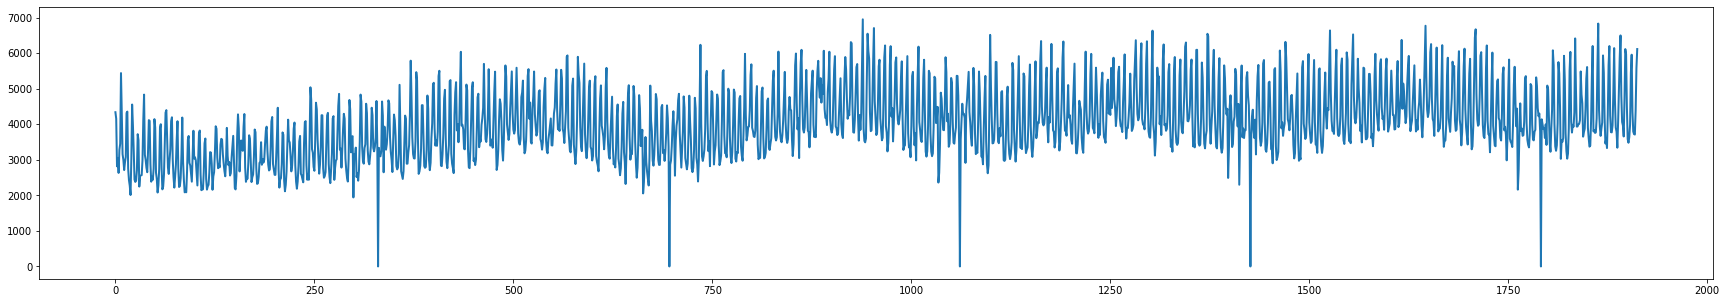

In [287]:
ts1 = level3.iloc[0,:]
plt.plot(list(range(0,level3.iloc[0,:].shape[0])),level3.iloc[0,:]) 
plt.show()

In [288]:
lag=28
y = ts1.iloc[lag:ts1.shape[0]]
X = ts1.iloc[0:y.shape[0]].values.reshape(-1,1)
t = np.arange(lag,ts1.shape[0])
lm = LinearRegression()
y = y.values.reshape(-1,1)


In [289]:
timeseries = pd.DataFrame(list(zip(X,t)))
sinx = np.sin(2*np.pi*t/lag)
p= pd.DataFrame(list(zip(sinx,cosx)))
cosx = np.cos(2*np.pi*t/lag)
X_predictors = pd.concat([timeseries,p],axis=1)


In [290]:
lm.fit(X_predictors,y)
err = (lm.predict(X_predictors)-y)
y_pred = lm.predict(X_predictors)

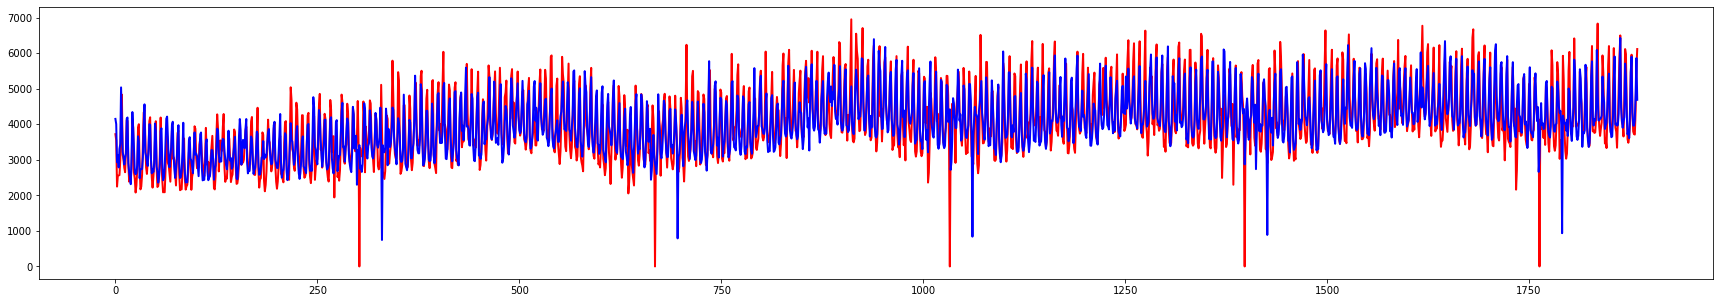

In [295]:
plt.plot(y,color='r')
plt.plot(y_pred,color='b')
plt.show()

In [293]:
mse = np.mean(np.square(err))
mse


297616.1881644844